<a href="https://colab.research.google.com/github/nfernandez97/Butterflies_Detection/blob/main/YOLOv5_Mariposas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Mariposas**
Este dataset se construyo usando WebScraping, se seleccionaron tres tipos de mariposas: 
* **Danaus gilippus**
* **Leptotes marina**
* **Heliconius charithonia**

Se etiquetaron usando la herramienta de Roboflow.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir "/content/Mariposas"

In [ ]:
!curl -L "https://universe.roboflow.com/augmented-startups/playing-cards-ow27d" > /content/PlayingCards/roboflow.zip
!unzip /content/Mariposas/roboflow.zip -d /content/Mariposas/
!rm -rf /content/Mariposas/roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   893  100   893    0     0    417      0  0:00:02  0:00:02 --:--:--   417
100 27.1M  100 27.1M    0     0  6359k      0  0:00:04  0:00:04 --:--:-- 12.2M
Archive:  /content/Mariposas/roboflow.zip
 extracting: /content/Mariposas/README.dataset.txt  
 extracting: /content/Mariposas/README.roboflow.txt  
 extracting: /content/Mariposas/data.yaml  
   creating: /content/Mariposas/test/
   creating: /content/Mariposas/test/images/
 extracting: /content/Mariposas/test/images/001_04d353b6_jpg.rf.29e94b7098886d72c0fad5e8ad3c789a.jpg  
 extracting: /content/Mariposas/test/images/001_bbbf0732_jpg.rf.8e502e5a50fd11368ea9b783cd8bfa79.jpg  
 extracting: /content/Mariposas/test/images/003_67face6c_jpg.rf.6b7475c3ba40b9e3099d784ae7507a50.jpg  
 extracting: /content/Mariposas/test/images/005_c6992e93_jpg.rf.6c2cd4b35112e409185e1987d7f2200a.jp

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

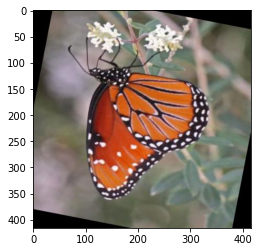

In [ ]:
plt.figure()
img = mpimg.imread('/content/Mariposas/train/images/001_e33a4bfa_jpg.rf.6f5cdc9b49bfc77a192cfa63740044f6.jpg')
plt.imshow(img) 
plt.show() 

In [ ]:
img.shape

(416, 416, 3)

In [ ]:
import glob
image_paths=glob.glob('/content/Mariposas/train/images/*.jpg')

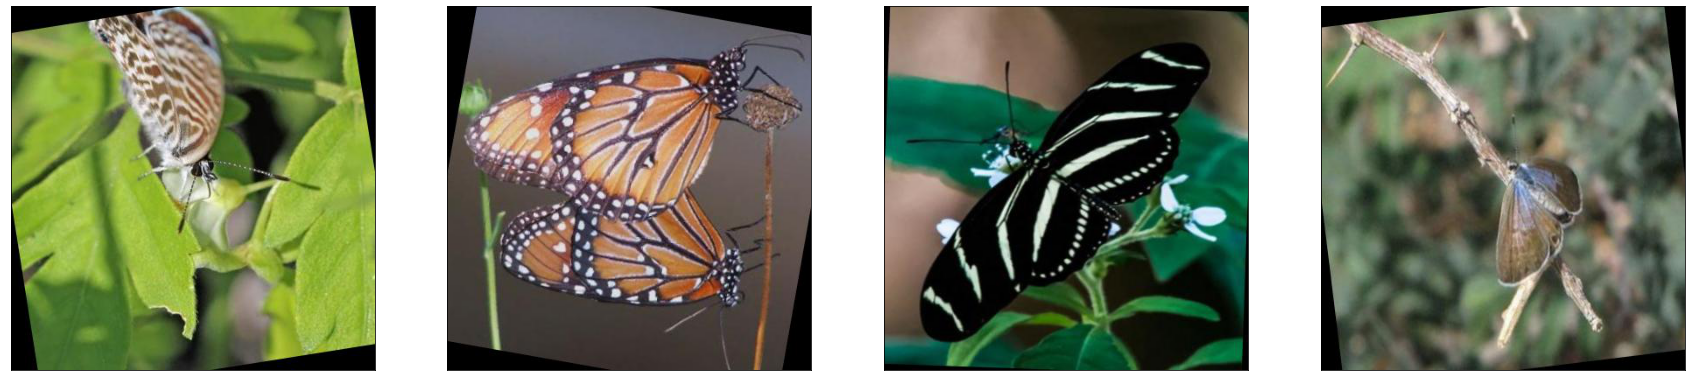

In [ ]:
plt.figure(figsize=(30,60))
for i,imgP in enumerate(image_paths[0:4]):
  ax = plt.subplot(1, 4, i + 1)
  img = mpimg.imread(imgP) 
  plt.imshow(img)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
import yaml
with open("/content/Mariposas/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'3'

Si vemos el fichero data.yaml es el que se genera automáticamenten las direcciones de las imágenes de entrenamiento y validación, así como la cantidad y los nombres de las clases.

Para que las direcciones de entrenamiento y validación estén correctas sin necesidad de cambiar los datos de dirección podemos ponerlas fichas. Copiemos las rutas de las mismas y pongámoslas en el fichero de forma que queden así:

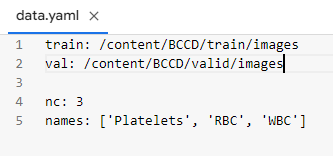



# Descargar modelo YOLOv5


Para esto vamos a seguir los siguientes pasos:
* Instalar dependencias YOLOv5
* Descargar datos personalizados de detección de objetos YOLOv5
* Escribir nuestra configuración de entrenamiento YOLOv5

**NOTA:** Recuerde elegir GPU en Runtime si aún no está seleccionado. 

*Entorno de ejecución --> Cambiar tipo de entorno de ejecución --> Acelerador de hardware --> GPU*)

## Instalar dependencas YOLOv5
Clonar el repositorio YOLOv5

Verificar que en content tenemos la carpeta *yolov5*

In [ ]:
# clone repositorio YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12526, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 12526 (delta 38), reused 35 (delta 15), pack-reused 12452
Receiving objects: 100% (12526/12526), 12.51 MiB | 31.79 MiB/s, done.
Resolving deltas: 100% (8574/8574), done.
/content/yolov5


In [ ]:
!pip install -qr requirements.txt  # instalar dependencias (ignore los errores)
import torch

from IPython.display import Image, clear_output

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 3.2 MB/s 
Setup complete. Using torch 1.12.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.1-369-g030586a Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.4/78.2 GB disk)


## Definir configuración y arquitectura

Escribiremos un script .yaml que defina los parámetros de nuestro modelo, como el número de clases y capa.

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Entrenar la red YOLO con este ejemplo

La función de entrenamiento recibe los siguientes parámetros:


*   batch: tamaño del lote (-1 para tamaño de lote automático). 
*   epochs: número de épocas.
*   data: ruta al archivo de configuración de datos.
*   cfg: ruta al archivo de configuraciones del modelo.
*   weights: ruta a los pesos iniciales.
*   cache : imágenes de caché para un entrenamiento más rápido.
*   img: tamaño de la imagen en píxeles (predeterminado: 640).

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 200 --data /content/Mariposas/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/Mariposas/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-369-g030586a Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

## Evaluar la red

Las pérdidas de entrenamiento y las métricas de rendimiento se guardan en Tensorboard y también en un archivo de registro definido anteriormente con el indicador *--name* cuando entrenamos. En nuestro caso, lo llamamos yolov5s_results. (Si no se le asigna un nombre, el valor predeterminado es *results.txt*). El archivo de resultados se representa como un png una vez que finaliza el entrenamiento.

**Nota de Glenn**: Los archivos *results.txt* parcialmente completados se pueden trazar con *from utils.utils import plot_results; plot_results()*.

Las pérdidas y métricas se dividen en tres partes:


*   box_loss — pérdida de regresión del cuadro delimitador (error cuadrático medio)
*   obj_loss — la confianza de la presencia del objeto es la pérdida de objetividad (Binary Cross Entropy)
*   cls_loss — la pérdida de clasificación (Cross Entropy)

*Precision*: mide la cantidad de predicciones de bbox que son correctas

*Recall*: mide cuánto del verdadero bbox se predijo correctamente

*mAP_0.5*: es la media de precisión promedio (mAP) en el umbral de IoU (intersección sobre unión) de 0.5. 

*mAP_0.5:0.95*: es el mAP promedio sobre diferentes umbrales de IoU, que van desde 0.5 a 0.95.

IoU= área de solapamiento / área de unión



In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 818), started 0:00:30 ago. (Use '!kill 818' to kill it.)

<IPython.core.display.Javascript object>

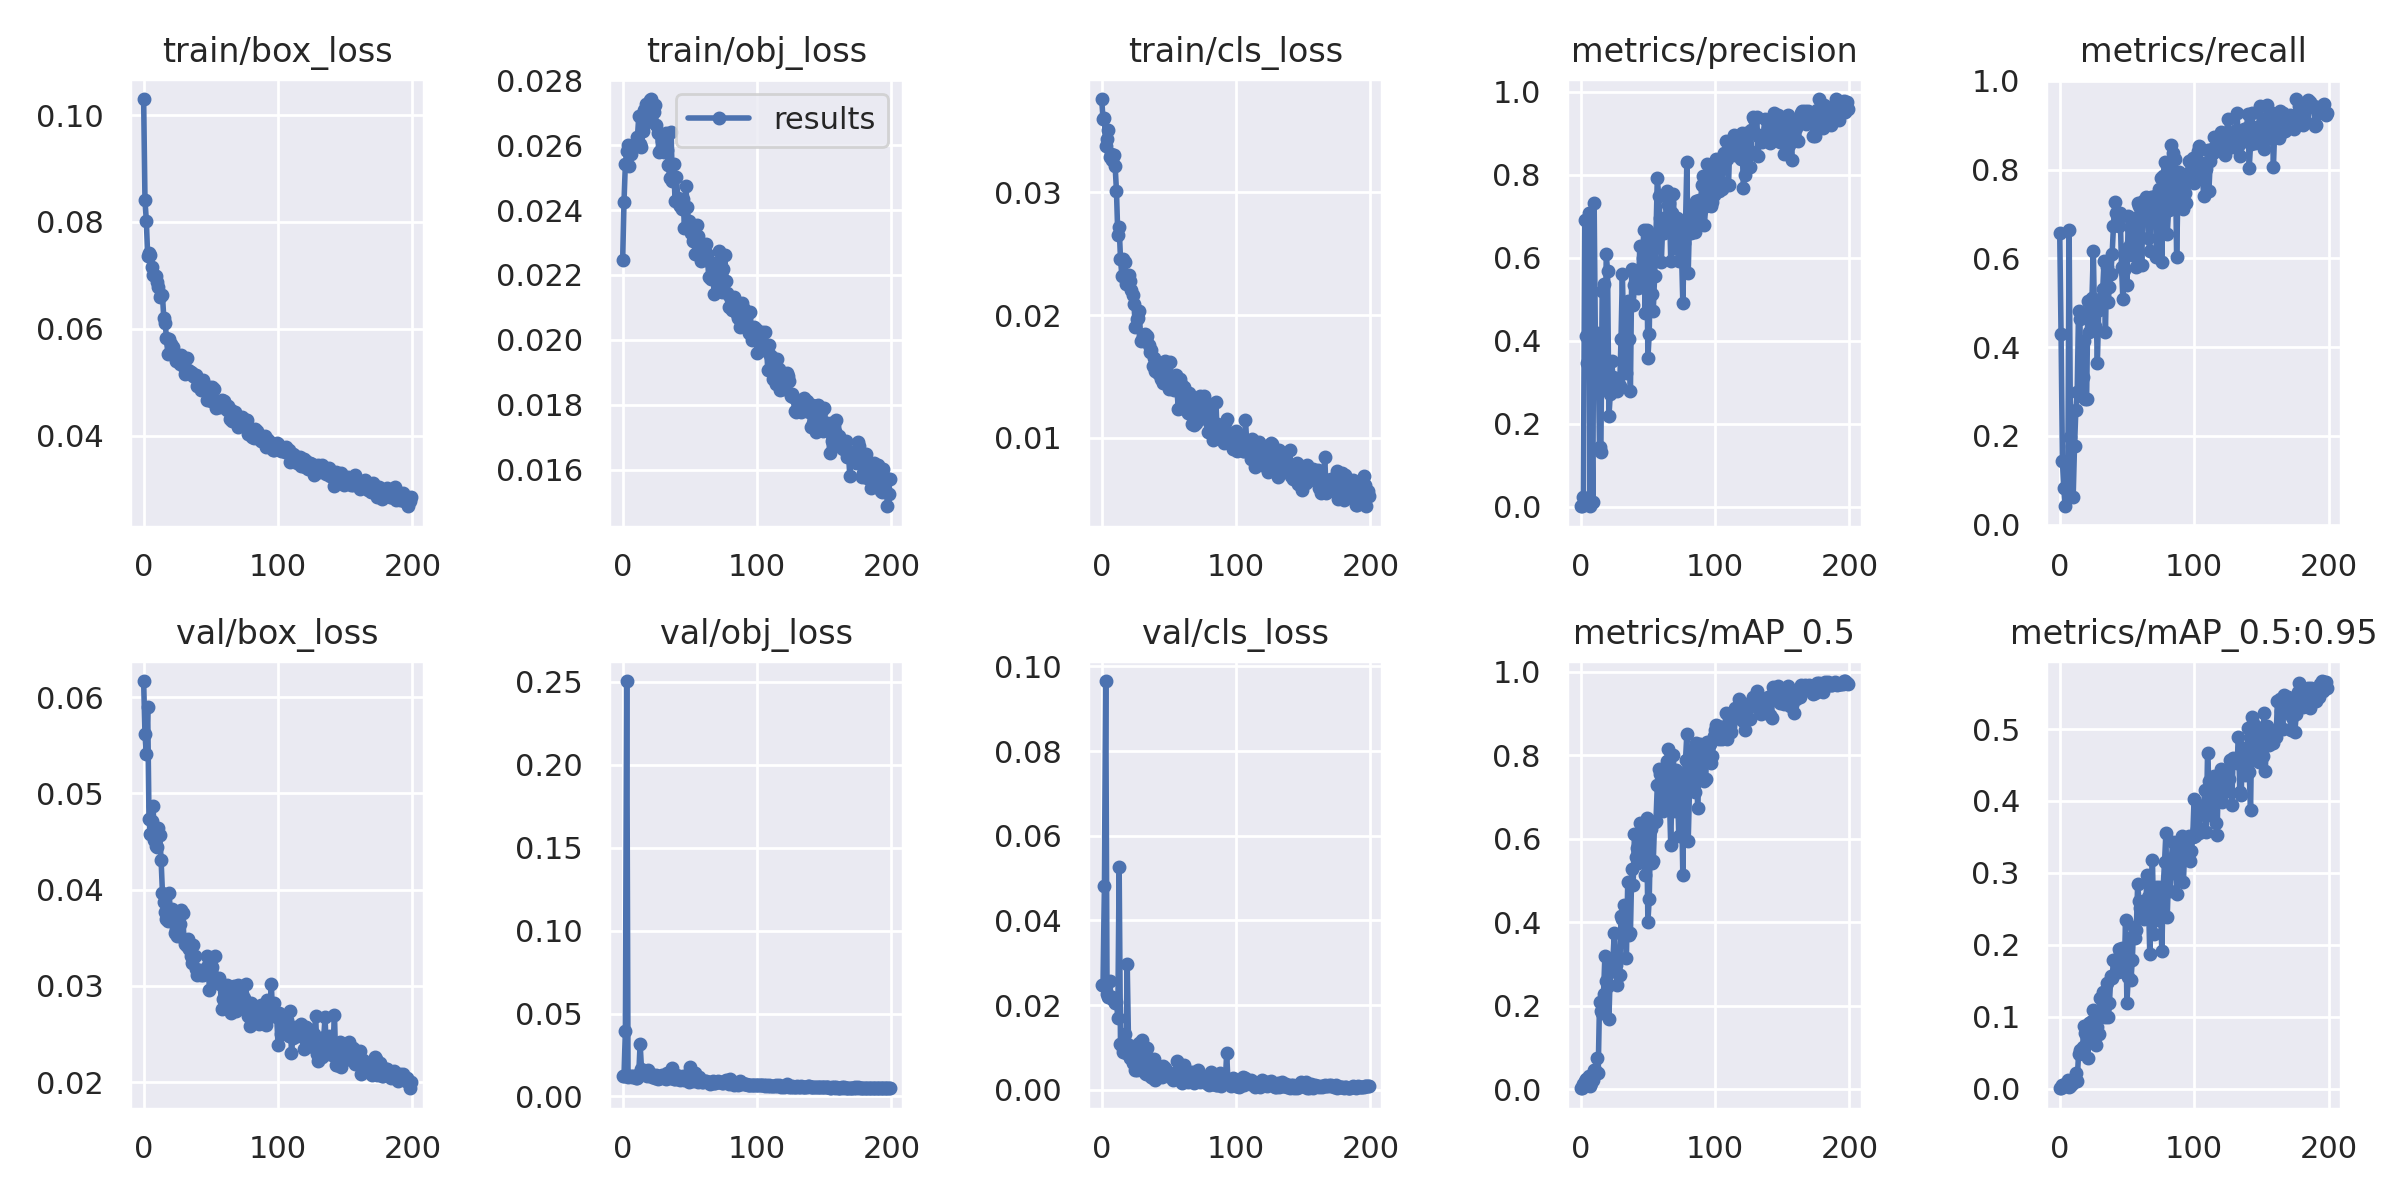

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

## Visualizar nuestros datos de entrenamiento con etiquetas

Después de que comience el entrenamiento, vea las imágenes `train*.jpg` para ver imágenes de entrenamiento, etiquetas y efectos de aumento.

Tenga en cuenta que se usa un cargador de datos de mosaico para el entrenamiento (que se muestra a continuación), un nuevo concepto de carga de datos desarrollado por Glenn Jocher y presentado por primera vez en [YOLOv4] (https://arxiv.org/abs/2004.10934).

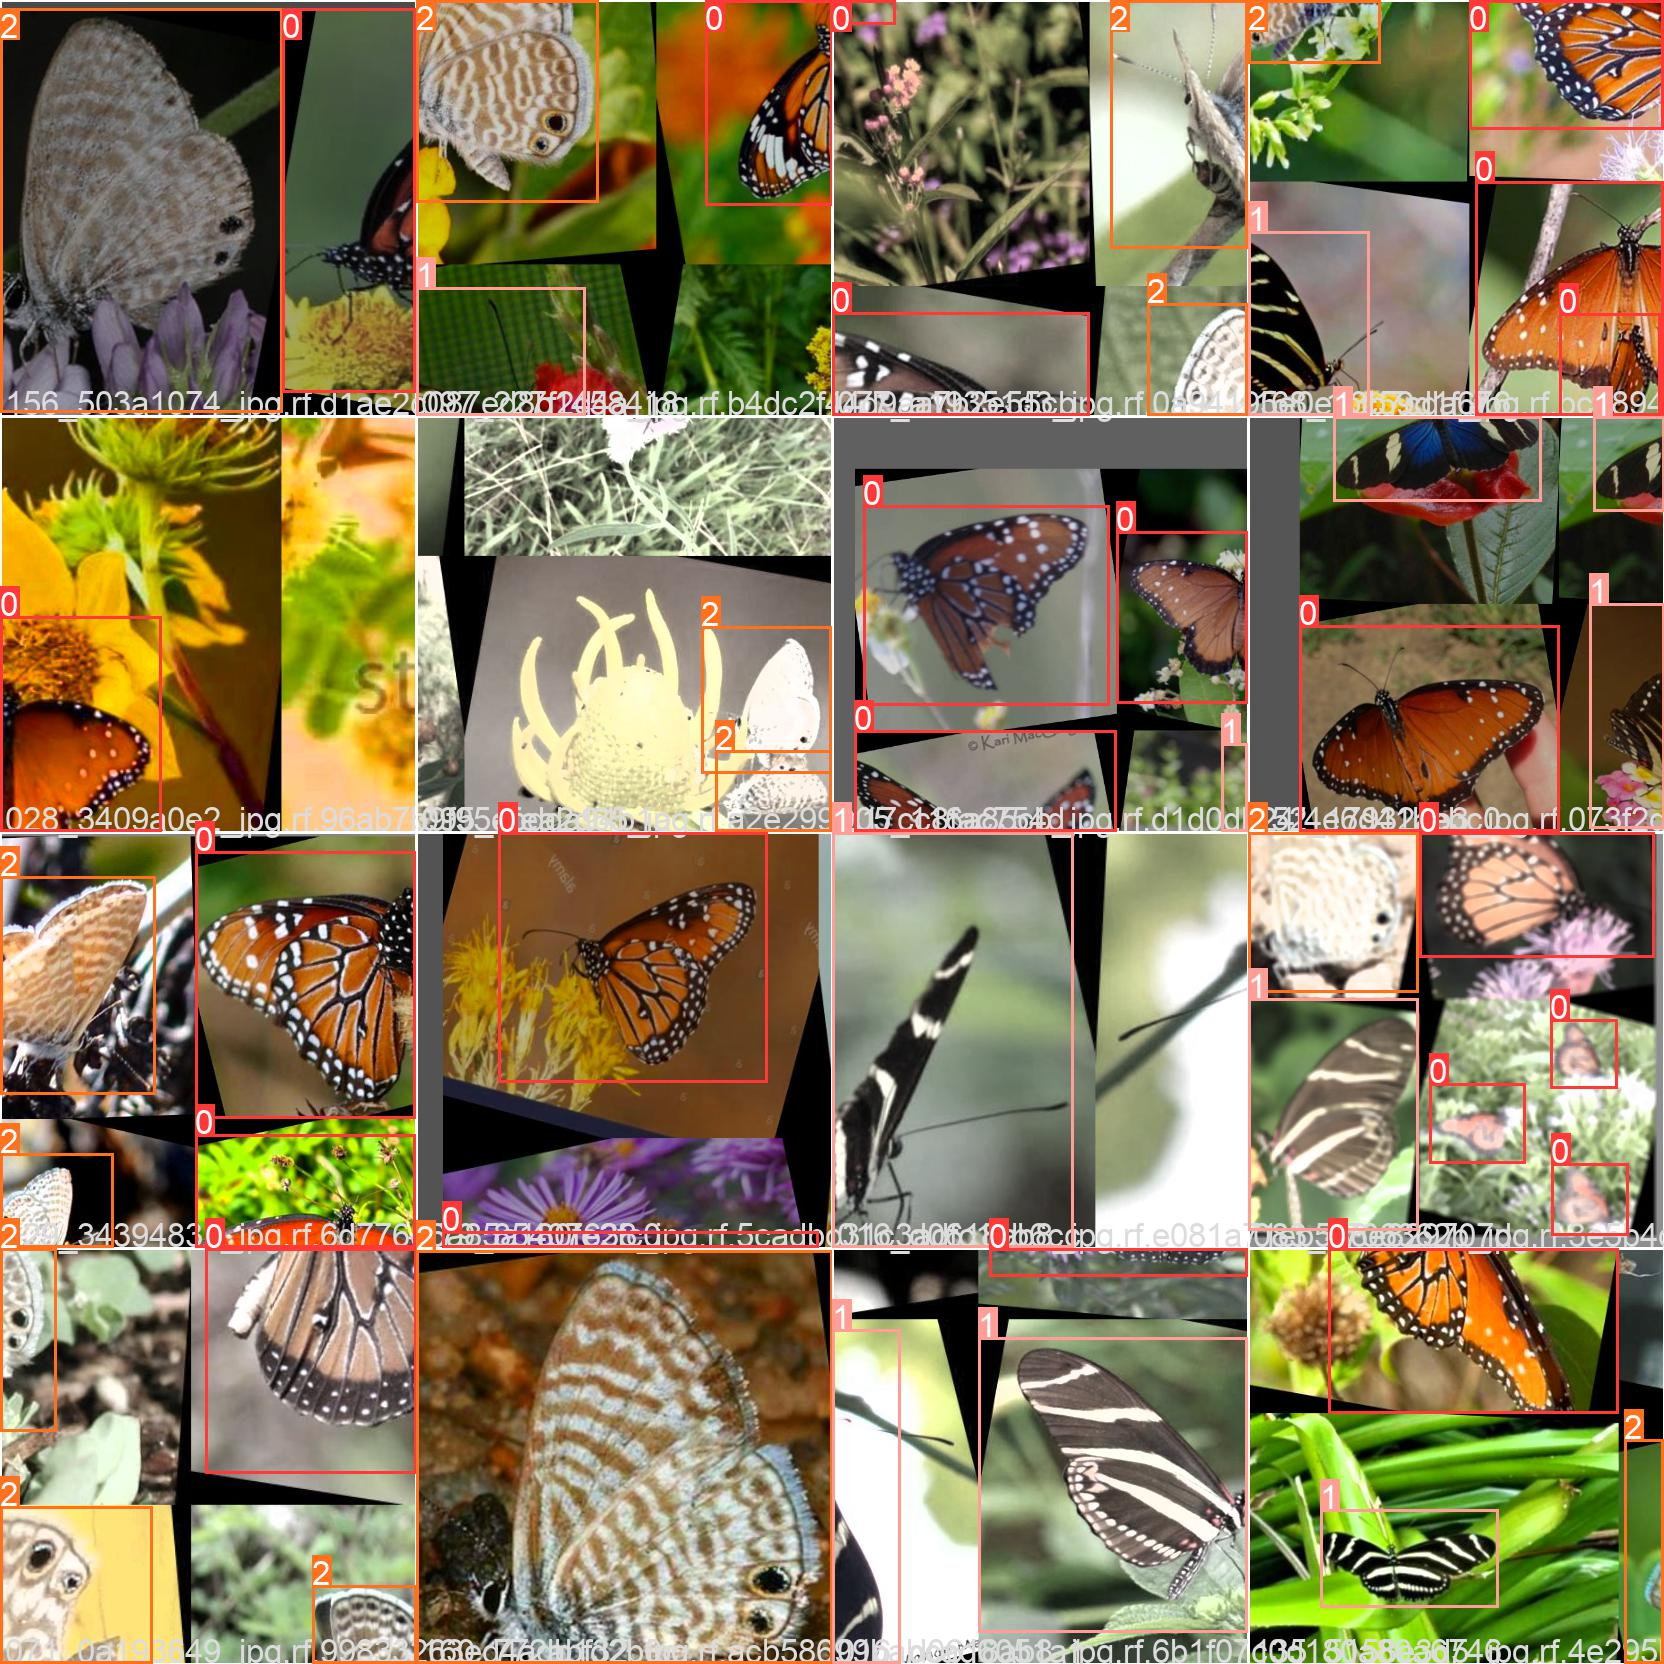

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=1000)

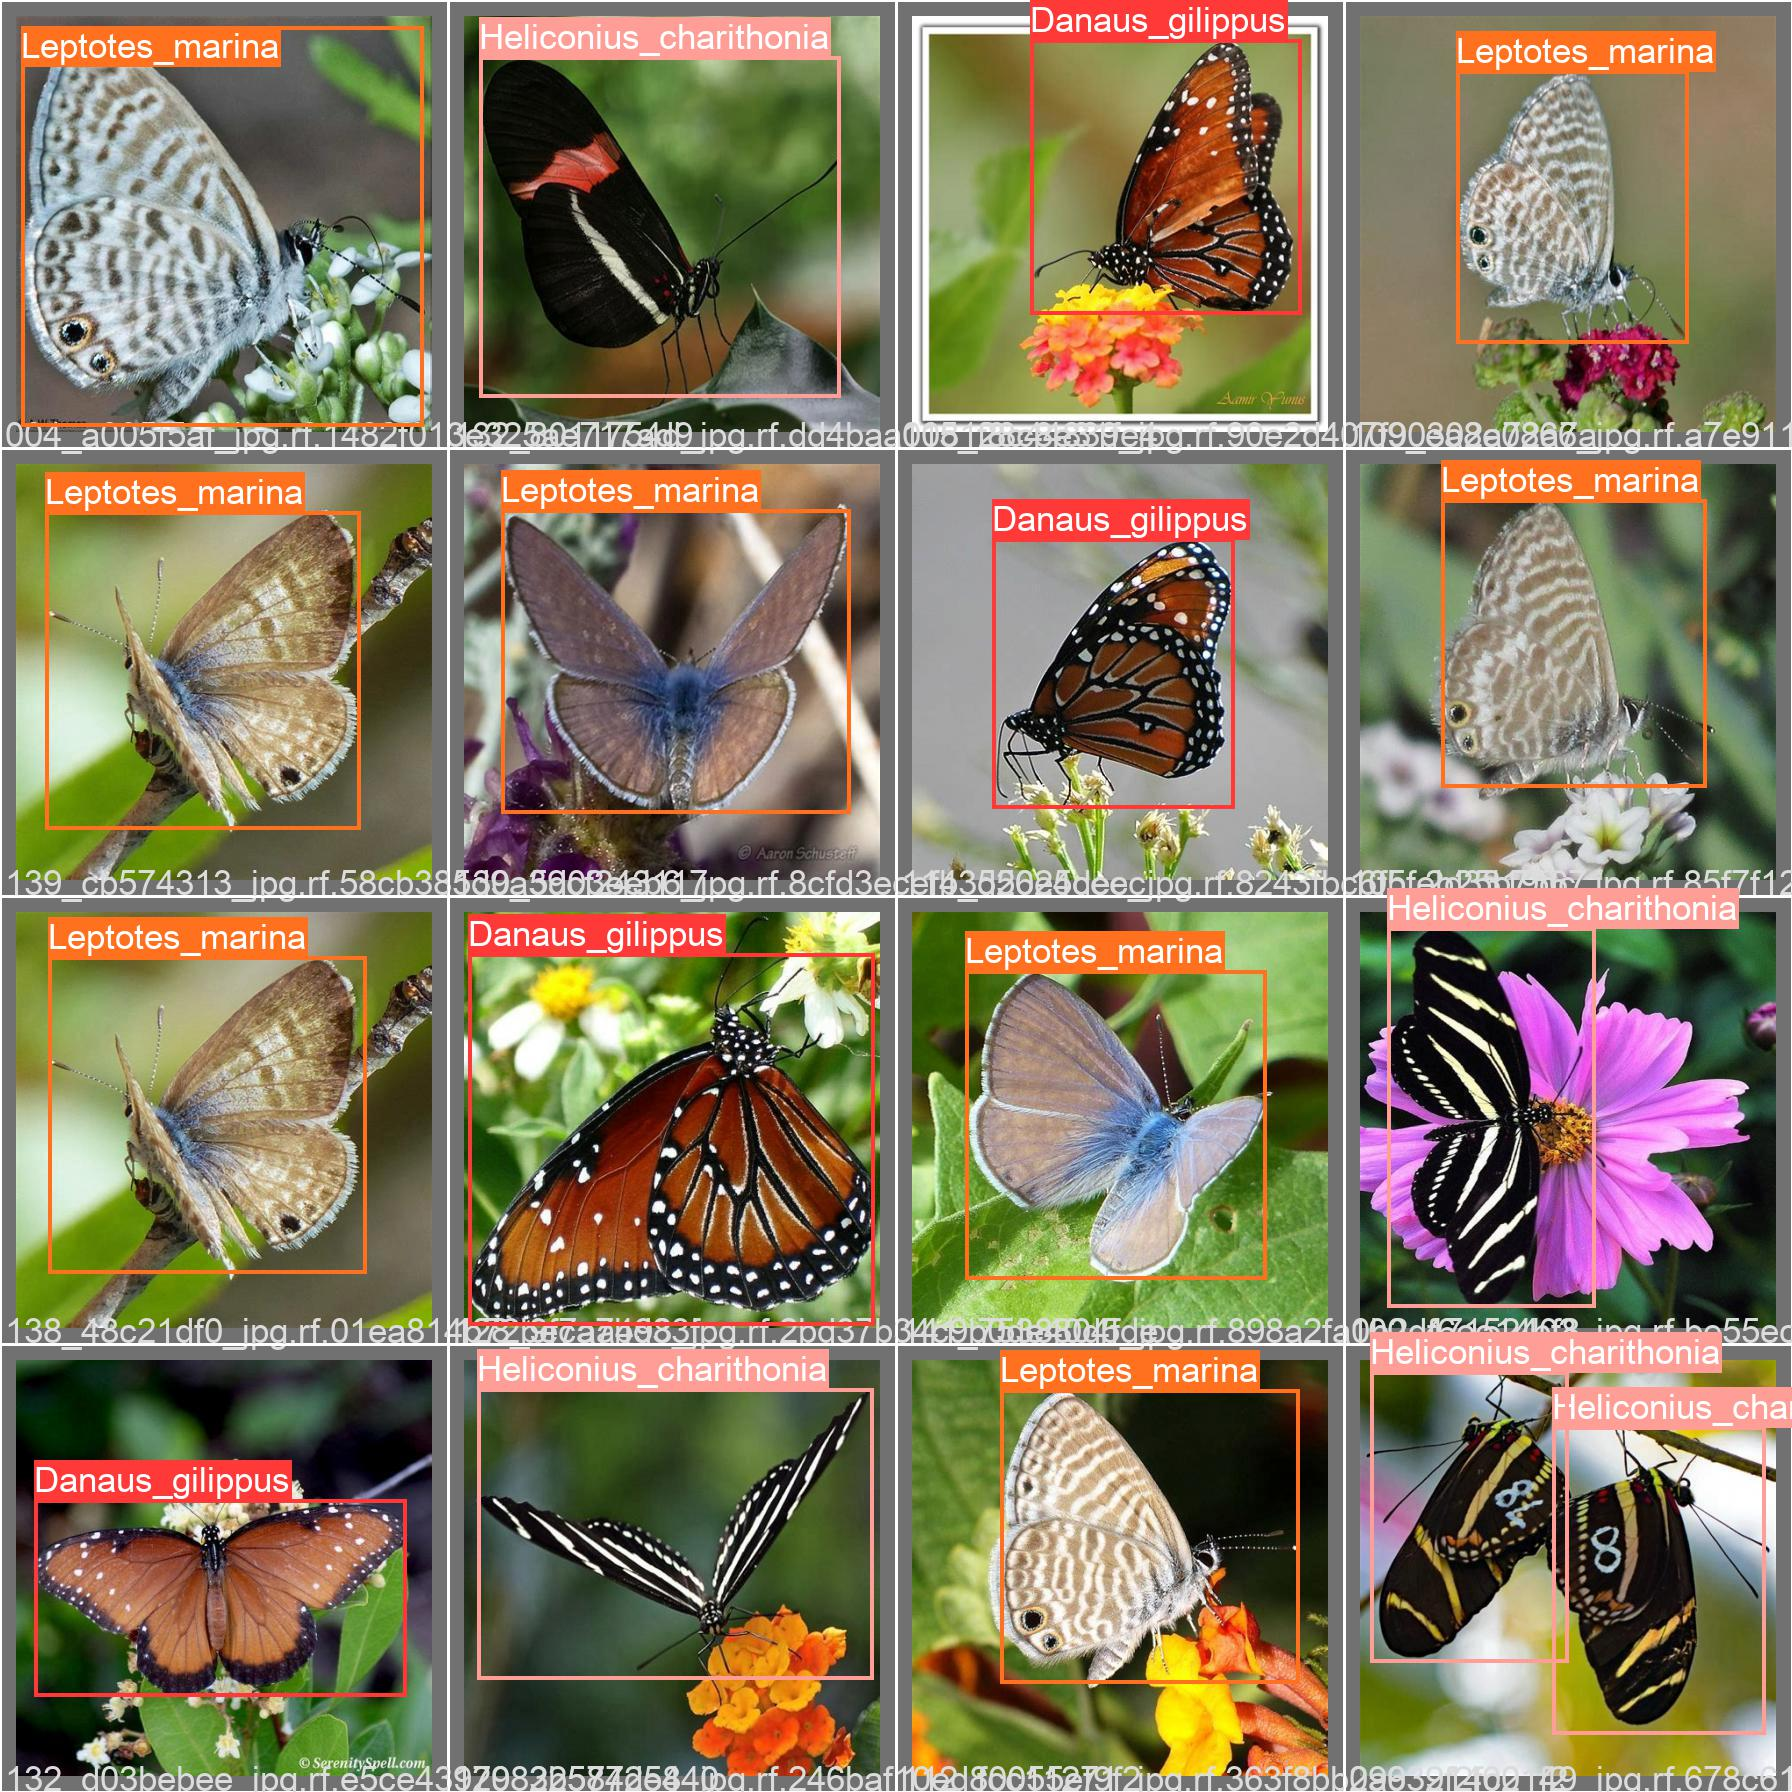

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=1000)

## Ejecutar inferencia con pesos entrenados
Ejecute la inferencia con un punto de control entrenado previamente en el contenido de la carpeta de prueba/imágenes descargada de Roboflow.

In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/Mariposas/test/images

/content/yolov5
detect: weights=['runs/train/yolov5s_results3/weights/best.pt'], source=/content/Mariposas/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-369-g030586a Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7251912 parameters, 0 gradients, 16.8 GFLOPs
image 1/53 /content/Mariposas/test/images/001_04d353b6_jpg.rf.29e94b7098886d72c0fad5e8ad3c789a.jpg: 416x416 1 Heliconius_charithonia, Done. (0.012s)
image 2/53 /content/Mariposas/test/images/001_bbbf0732_jpg.rf.8e502e5a50fd11368ea9b783cd8bfa79.jpg: 416x416 1 Leptotes_marina, Done. (0.012s)
image 3/53 /content/M

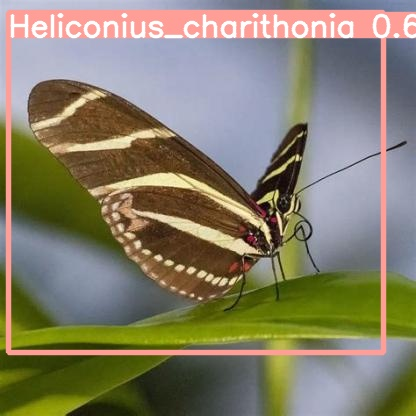

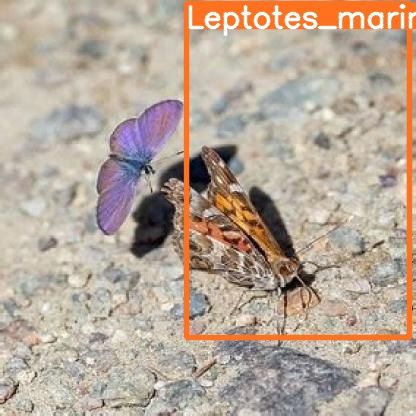

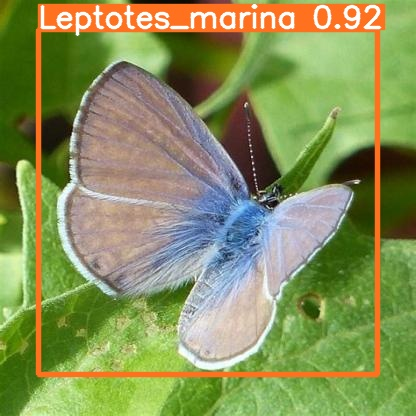

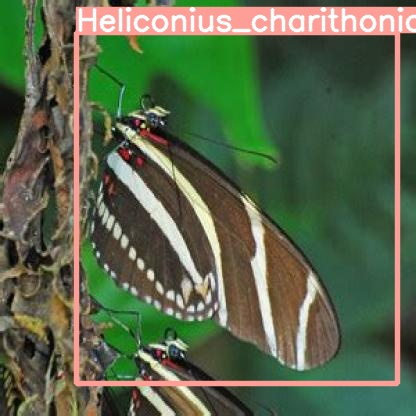

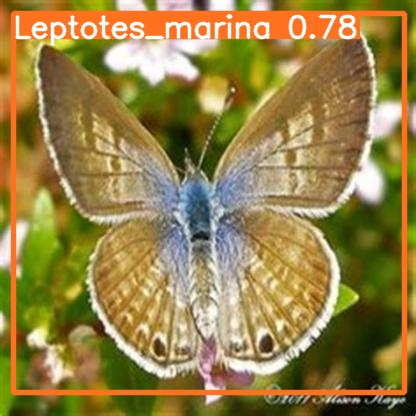

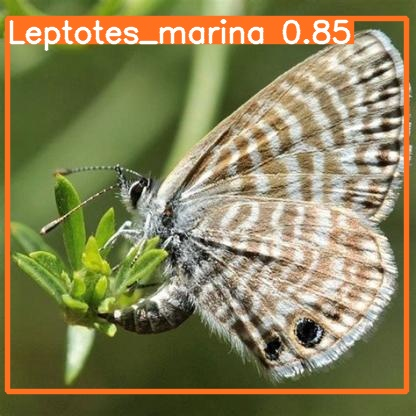

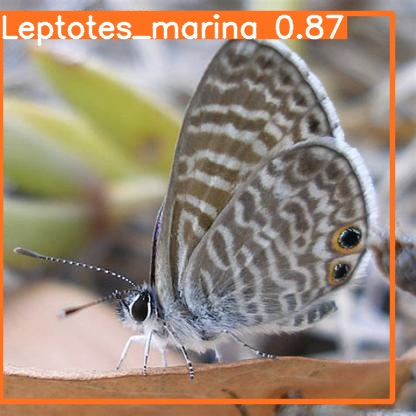

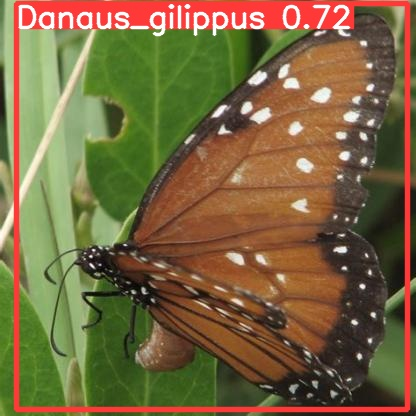

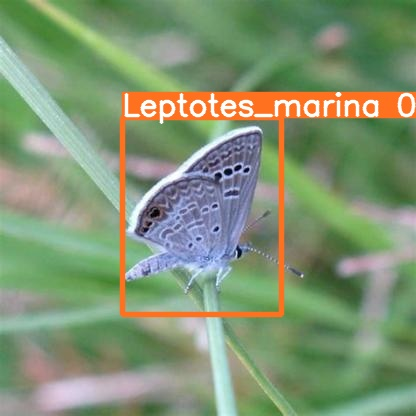

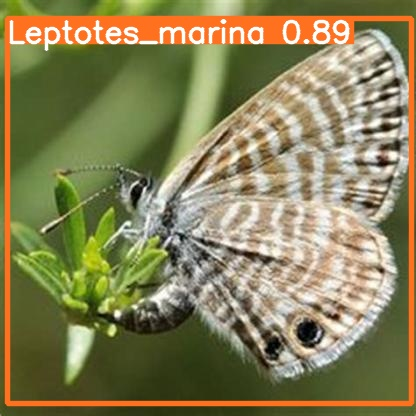

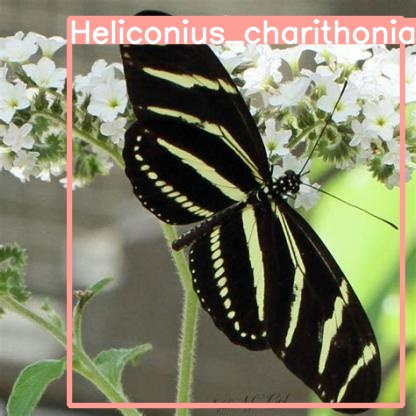

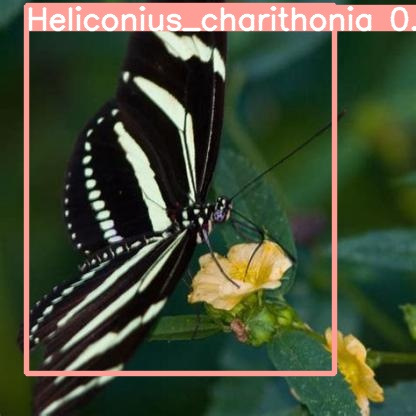

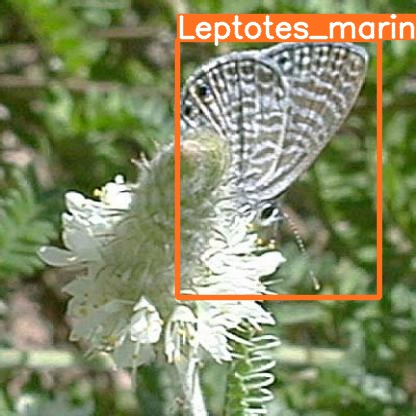

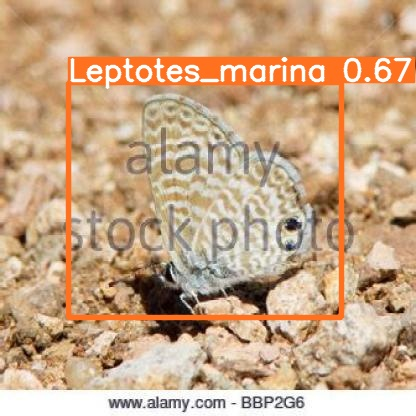

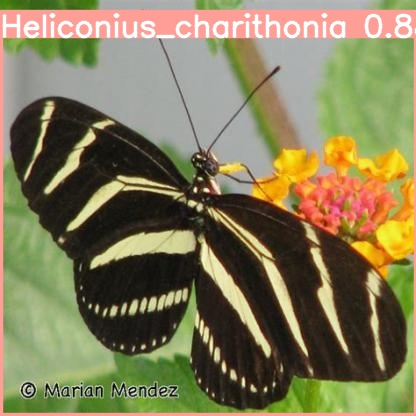

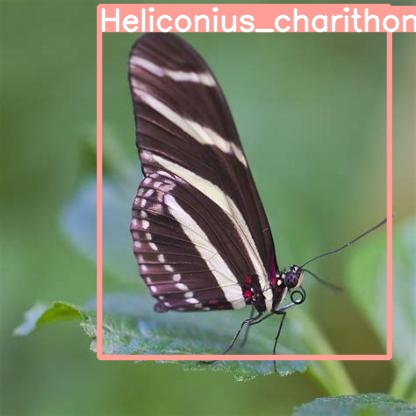

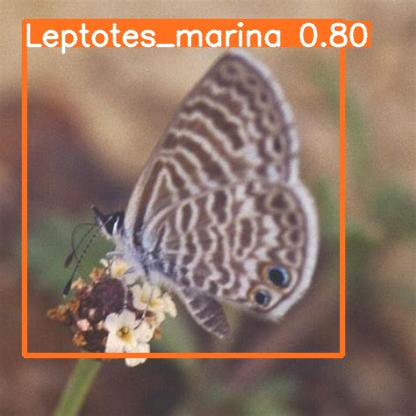

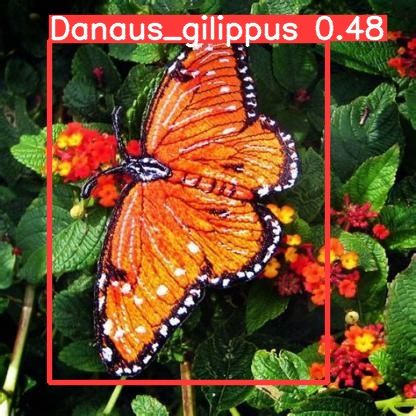

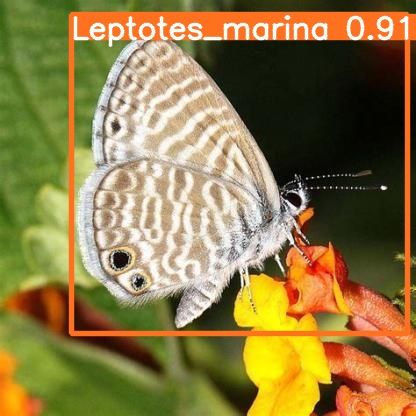

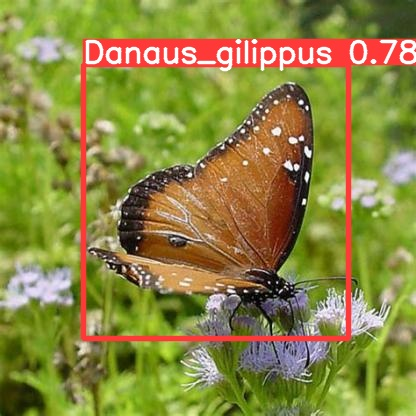

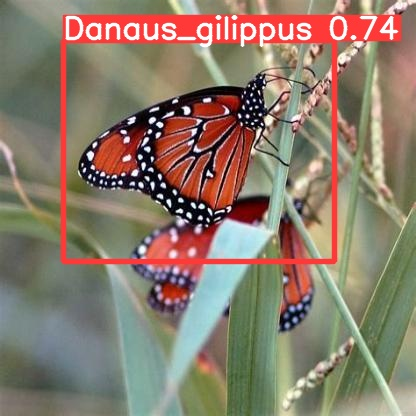

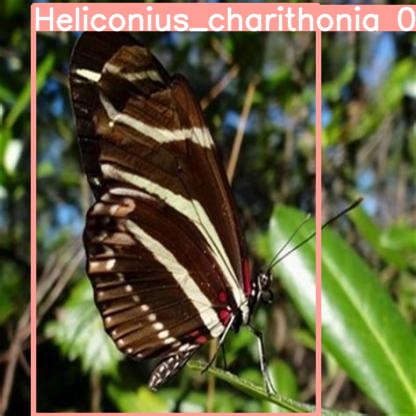

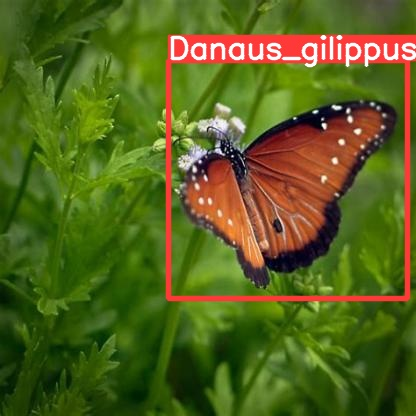

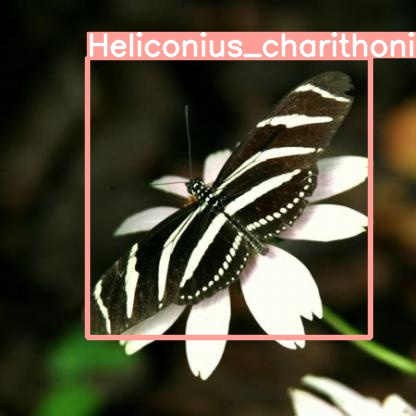

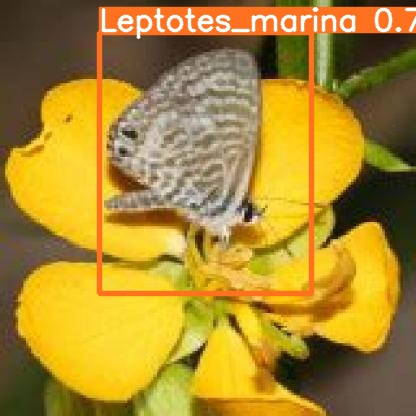

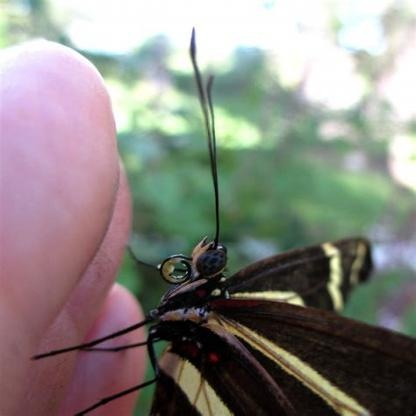

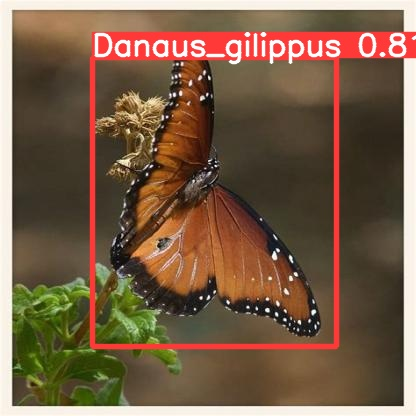

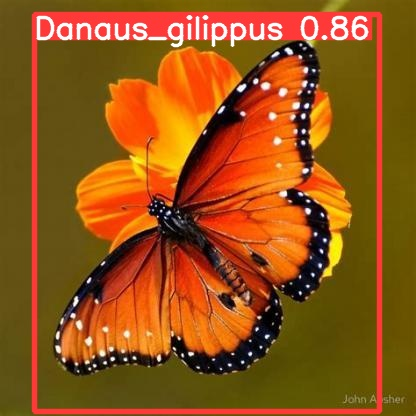

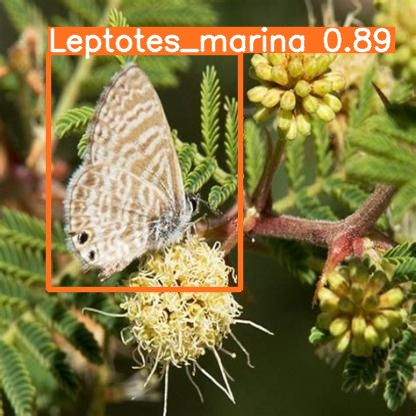

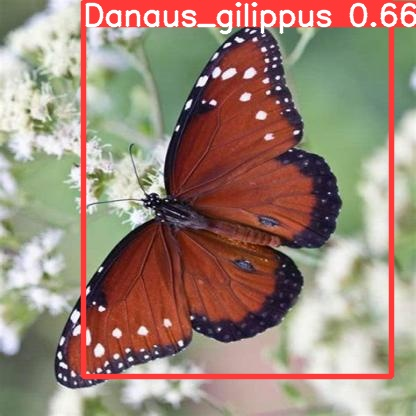

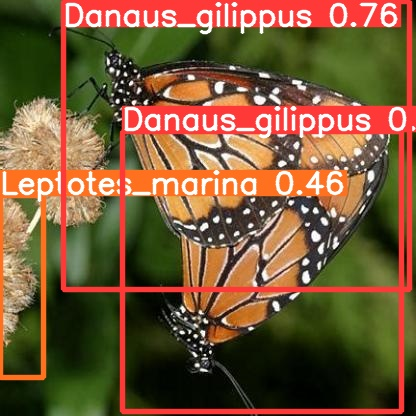

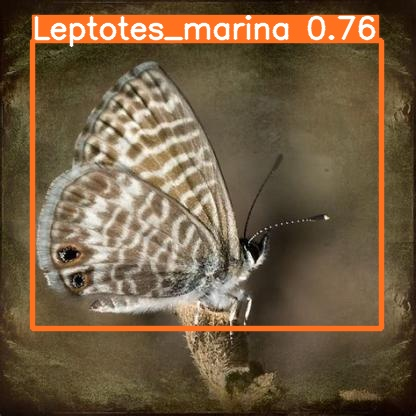

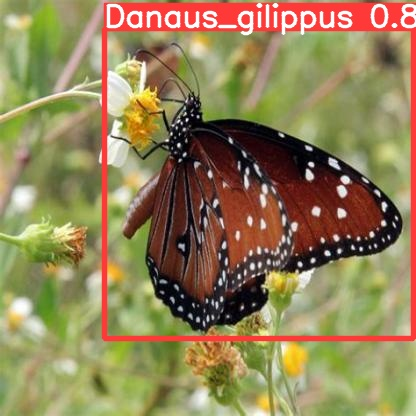

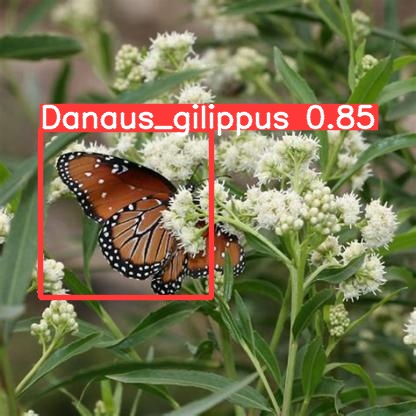

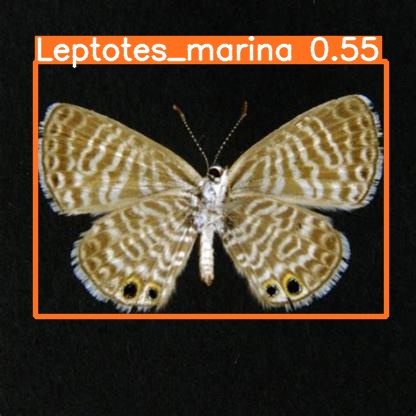

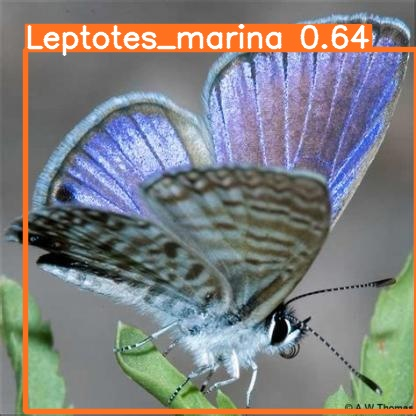

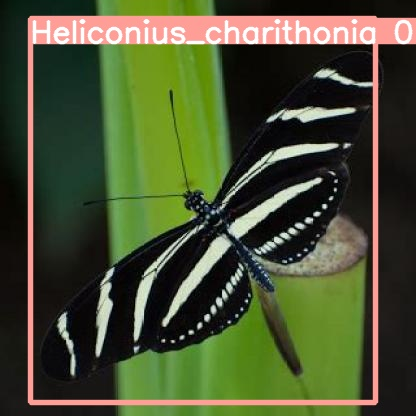

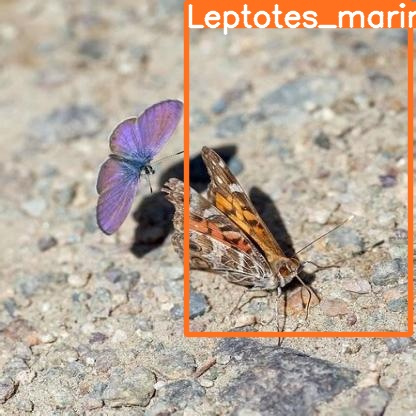

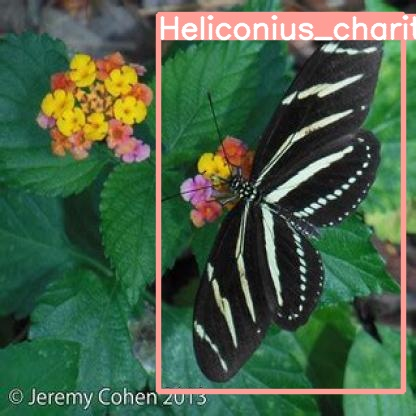

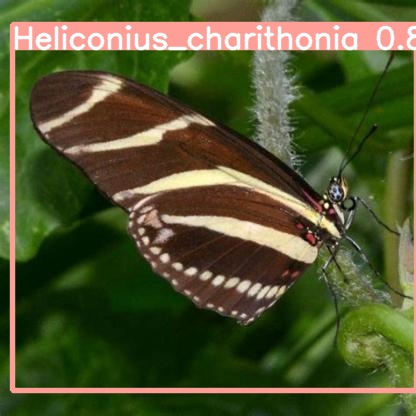

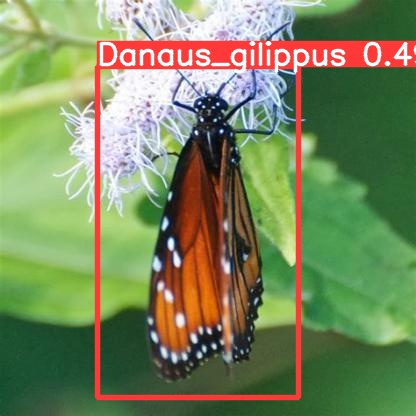

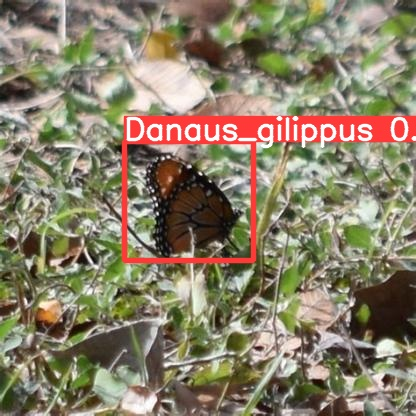

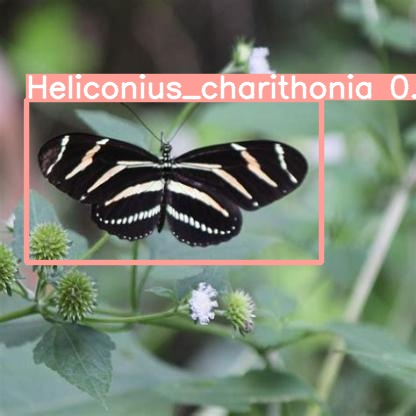

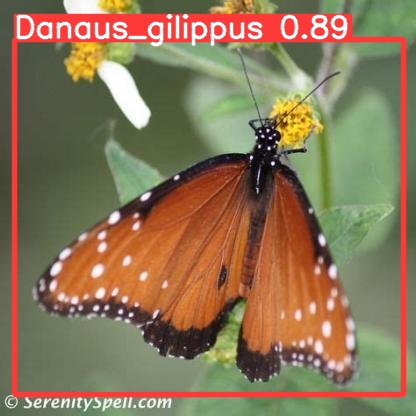

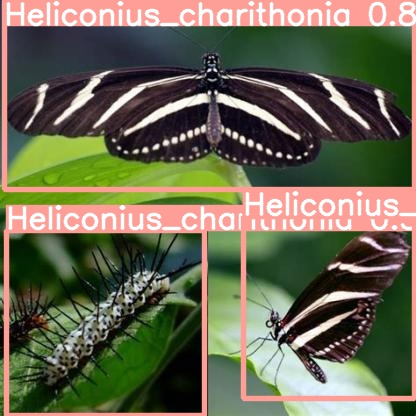

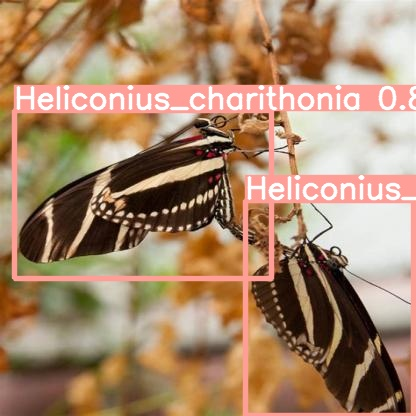

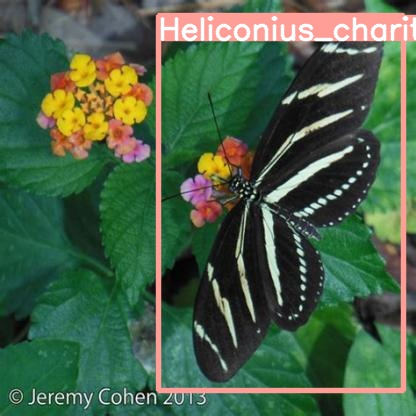

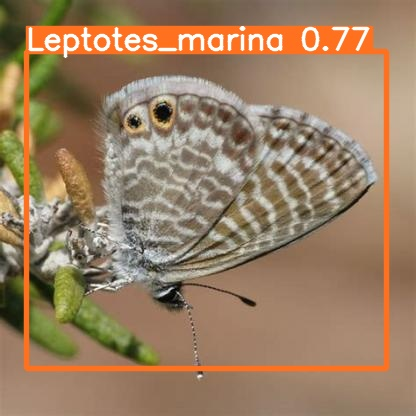

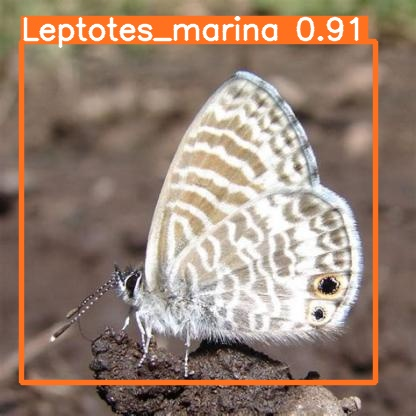

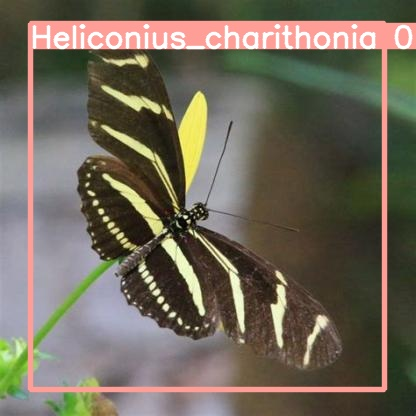

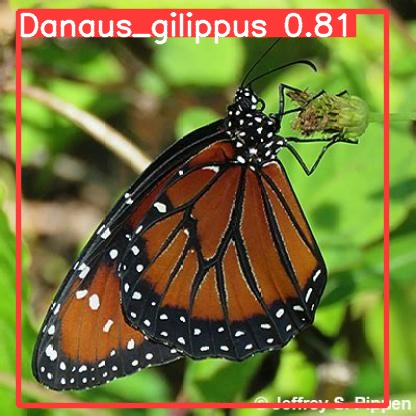

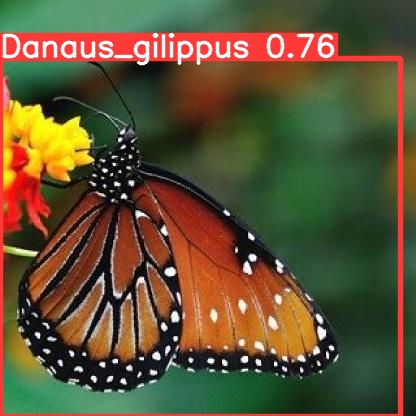

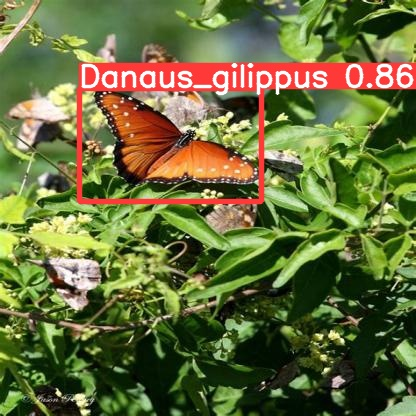

In [ ]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  display(Image(filename=imageName))
  print("\n")

# Exportar pesos entrenados para futuras inferencias

Ahora que ha entrenado su detector personalizado, puede exportar los pesos entrenados que ha hecho aquí para inferirlos en su dispositivo en otro lugar.

In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/drive/MyDrive/Datos/